In [56]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [57]:
data_image = 'fashion-data/images/'
data_anno = 'fashion-data/annotation/'

data_image_train = data_image + 'train2020/train/'
data_anno_train = data_anno + 'attributes_train2020.json'

image name: 4507cdc25fe8925a9c047c64b21bcdb0.jpg


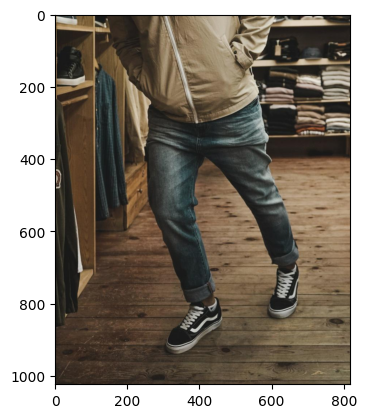

In [35]:
img_list = os.listdir(data_image_train)
rand_img = random.choice(img_list)

img = Image.open(data_image_train + rand_img)

print(f'image name: {rand_img}')
plt.imshow(img)

In [32]:
with open(data_anno_train) as f:
    train_anno = json.load(f)

train_anno.keys()

dict_keys(['annotations', 'images', 'info', 'licenses', 'attributes'])

In [51]:
def get_image_infor(image_name, anno):
    for item in anno['images']:
        if(image_name == item['file_name']):
            return item
        
def get_image_anno(image_id, anno):
    for item in anno['annotations']:
        if(item['image_id'] == image_id):
            return item

def get_image_attributes(id_atts, anno_att):
    image_attributes = [item['id', 'name'] for item in anno_att if item['id'] in id_atts]
    return image_attributes

In [53]:
image_infor = get_image_infor(rand_img, train_anno)
image_infor

{'id': 2289,
 'width': 819,
 'height': 1024,
 'file_name': '4507cdc25fe8925a9c047c64b21bcdb0.jpg',
 'license': 7,
 'time_captured': 'March-August, 2018',
 'original_url': 'https://unsplash.com',
 'isstatic': 0,
 'kaggle_id': '4507cdc25fe8925a9c047c64b21bcdb0'}

In [54]:
image_anno = get_image_anno(image_infor['id'], train_anno)
image_anno

{'image_id': 2289,
 'attribute_ids': [22,
  36,
  115,
  136,
  142,
  145,
  146,
  154,
  160,
  204,
  222,
  230,
  295,
  298,
  311,
  317]}

In [55]:
image_attributes = get_image_attributes(image_anno['attribute_ids'], train_anno['attributes'])
image_attributes

KeyError: ('id', 'name')